In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_excel("https://github.com/theleadio/datascience_demo/blob/master/social-ads-raw.xlsx?raw=true")

In [3]:
df.head()

,segment,google,facebook,instagram,sales,size,area,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1,230.1,37.8,69.2,22.1,large,rural,NaN,NaN,NaN,NaN
1,2,44.5,39.3,45.1,10.4,small,urban,NaN,NaN,NaN,NaN
2,3,17.2,45.9,69.3,9.3,small,rural,NaN,NaN,NaN,NaN
3,4,151.5,41.3,58.5,18.5,small,urban,NaN,NaN,NaN,NaN
4,5,180.8,10.8,58.4,12.9,large,suburban,NaN,NaN,NaN,NaN


In [4]:
df = df.drop(['Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10'],axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   segment    200 non-null    int64  
 1   google     200 non-null    float64
 2   facebook   200 non-null    float64
 3   instagram  200 non-null    float64
 4   sales      200 non-null    float64
 5   size       200 non-null    object 
 6   area       200 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 11.1+ KB


In [6]:
df['size'].unique()

array(['large', 'small'], dtype=object)

In [7]:
df['area'].unique()

array(['rural', 'urban', 'suburban'], dtype=object)

In [8]:
df = pd.get_dummies(data=df,columns=['size'])
df = pd.get_dummies(data=df,columns=['area'])

In [9]:
df.describe()

,segment,google,facebook,instagram,sales,size_large,size_small,area_rural,area_suburban,area_urban
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500,0.540000,0.460000,0.295000,0.390000,0.315000
std,57.879185,85.854236,14.846809,21.778621,5.217457,0.499648,0.499648,0.457187,0.488974,0.465682
min,1.000000,0.700000,0.000000,0.300000,1.600000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.750000,74.375000,9.975000,12.750000,10.375000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,100.500000,149.750000,22.900000,25.750000,12.900000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,150.250000,218.825000,36.525000,45.100000,17.400000,1.000000,1.000000,1.000000,1.000000,1.000000
max,200.000000,296.400000,49.600000,114.000000,27.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# drop discrete data
linear_df = df.drop(['segment'],axis=1)

In [11]:
#subplots
from matplotlib import pyplot as plt

<AxesSubplot:xlabel='instagram', ylabel='sales'>

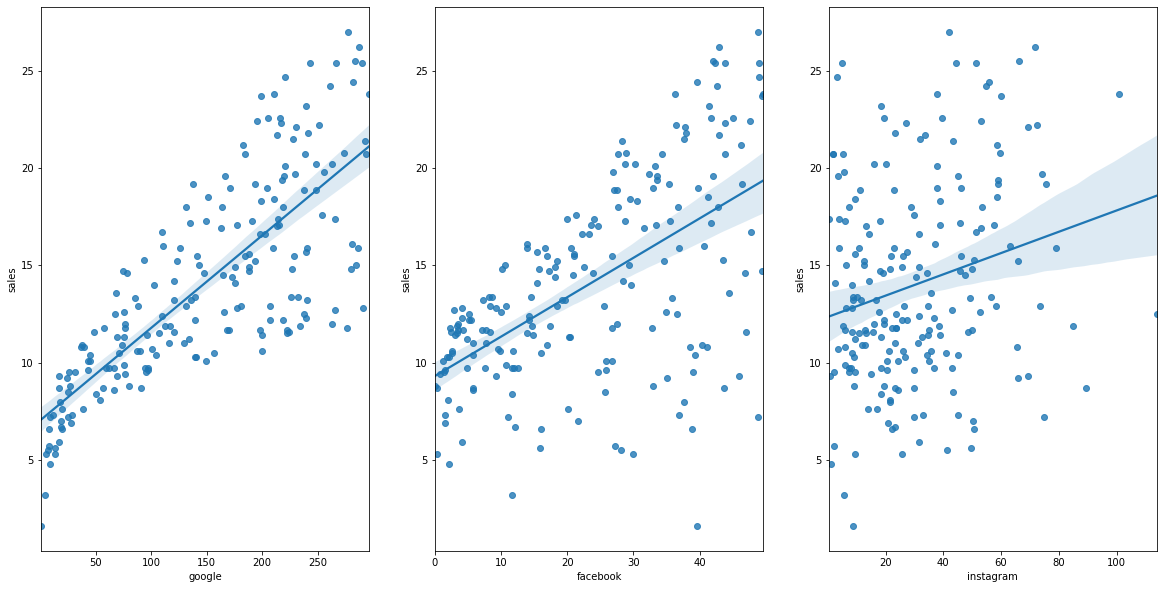

In [12]:
main, subplots = plt.subplots(1,3, figsize=(20,10))
sns.regplot(data=linear_df,x='google',y='sales',ax=subplots[0])
sns.regplot(data=linear_df,x='facebook',y='sales',ax=subplots[1])
sns.regplot(data=linear_df,x='instagram',y='sales',ax=subplots[2])

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [14]:
#predict google sales using ads spending
multi = ['google','facebook', 'instagram','size_large','area_rural','area_suburban','area_urban']

train_data_google = linear_df[['google']]
train_data_facebook = linear_df[['facebook']]
train_data_instagram = linear_df[['instagram']]
train_data_multi = linear_df[multi]
train_target = linear_df[['sales']]



In [15]:
model_google = LinearRegression()
model_facebook = LinearRegression()
model_instagram = LinearRegression()
model_multi = LinearRegression()

model_google.fit(train_data_google,train_target)
model_facebook.fit(train_data_facebook,train_target)
model_instagram.fit(train_data_instagram,train_target)
model_multi.fit(train_data_multi,train_target)

LinearRegression()

In [16]:
#Google
print('Google linear regression results:')
print('Score: ',model_google.score(train_data_google,train_target))
print('Intercept: ',model_google.intercept_)
print('Coefficient: ', model_google.coef_)

Google linear regression results:
Score:  0.611875050850071
Intercept:  [7.03259355]
Coefficient:  [[0.04753664]]


In [17]:
#Facebook
print('Facebook linear regression results:')
print('Score: ',model_facebook.score(train_data_facebook,train_target))
print('Intercept: ',model_facebook.intercept_)
print('Coefficient: ', model_facebook.coef_)

Facebook linear regression results:
Score:  0.33203245544529525
Intercept:  [9.3116381]
Coefficient:  [[0.20249578]]


In [18]:
#Instagram
print('Instagram linear regression results:')
print('Score: ',model_instagram.score(train_data_instagram,train_target))
print('Intercept: ',model_instagram.intercept_)
print('Coefficient: ', model_instagram.coef_)

Instagram linear regression results:
Score:  0.05212044544430516
Intercept:  [12.35140707]
Coefficient:  [[0.0546931]]


In [19]:
#Multi-Features
print('Linear regression results:')
print('Score: ',model_multi.score(train_data_multi,train_target))
print('Intercept: ',model_multi.intercept_)
print('Coefficient: ', model_multi.coef_)
#['google','facebook', 'instagram','size_large','area_rural','area_suburban','area_urban']

Linear regression results:
Score:  0.8981611875394304
Intercept:  [2.92804933]
Coefficient:  [[ 0.04574401  0.1878667  -0.0010877   0.07739661 -0.05385834 -0.16042133
   0.21427968]]


In [36]:
model_multi.predict([[60,30,10,1,0,0,1]])

array([[11.58949013]])

In [37]:
#If price of product is 5000 per unit
product_price = 5000
expected_revenue = 11.58949013 * 1000 * product_price
print(f"Expected revenue is {expected_revenue:,.2f}")

Expected revenue is 57,947,450.65
